In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

figure_path = '../Figures/'
gpd_file_path = '../Data/'
gpd_file_name = 'sig_5179.shp'

In [4]:
# plot setting
plt.rcParams['font.family']='Arial'

bar_width=0.25
plt.rc('axes', labelsize=11)
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
plt.rc('figure', titlesize=10) 
title_size = 18
label_size = 14
point_alpha = 0.8


# color setting
color_vs = ['#E881A6', '#6EA1D4']
color_year2 = ['#FFBE98', '#FFA74F', '#E881A6', '#60C8B3', '#6EA1D4']
color_year = ['#EFCFBA', '#FFB2A5', '#FA9A85',  '#DE8286', '#F97272']

set_dpi=300

In [5]:
location = pd.read_csv(gpd_file_path + 'ASF_WildBoar_Update.csv')
korea = gpd.read_file(gpd_file_path +  gpd_file_name)
korea = korea.to_crs(epsg=4326)

# error correction
location.loc[location['경도'].str[-2] == '.','경도'] = 128.3489
location['위도'] = location['위도'].str.replace(',', '')
location['경도'] = location['경도'].astype(float)
location['위도'] = location['위도'].astype(float)

location['확진'] = pd.to_datetime(location['확진'], format = '%Y-%m-%d')
location = location.rename(columns = {'위도' : 'y', '경도' : 'x'}, inplace  = False)

# Year
location_2019 = location.query('확진 < "2020-01-01"')
location_2020 = location.query('확진 >= "2020-01-01" & 확진 < "2021-01-01"')
location_2021 = location.query('확진 >= "2021-01-01" & 확진 < "2022-01-01"')
location_2022 = location.query('확진 >= "2022-01-01" & 확진 < "2023-01-01"')
location_2023 = location.query('확진 >= "2023-01-01" & 확진 < "2024-01-01"')

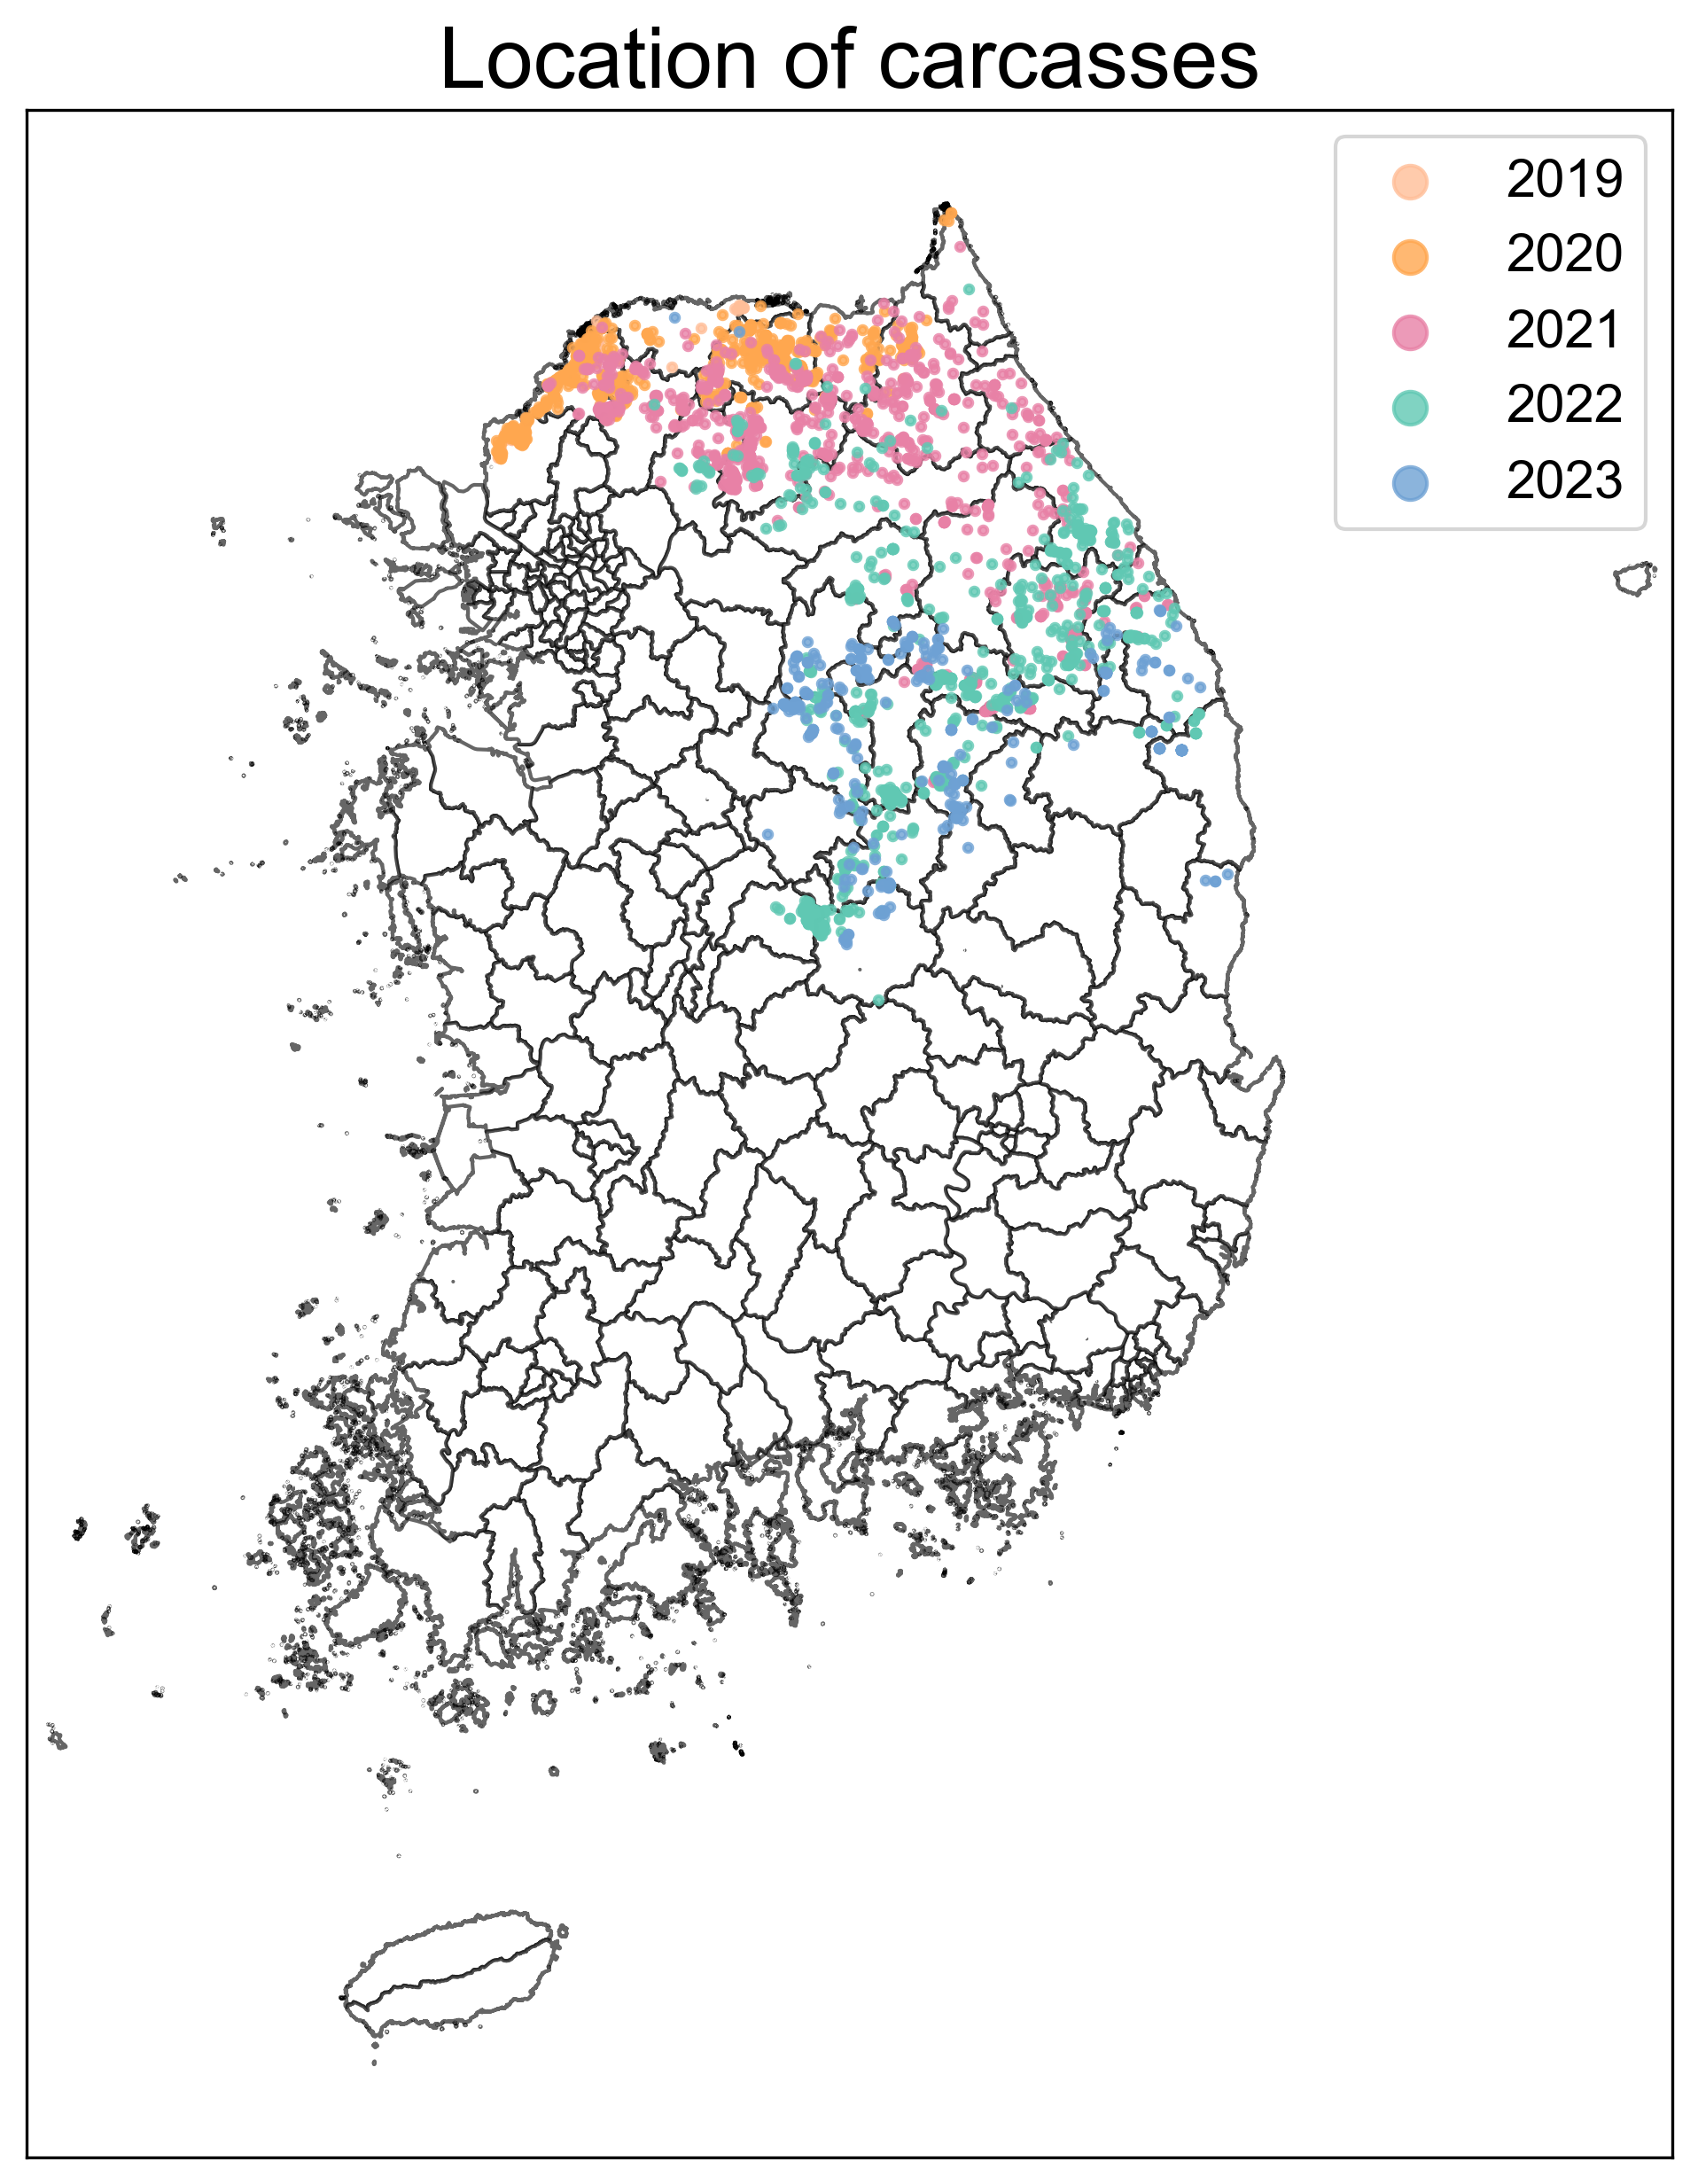

In [6]:
fig, ax = plt.subplots(figsize = (12, 10), dpi = set_dpi)
korea.plot(ax = ax, color = 'white', edgecolor = 'black', alpha = 0.6)
ax.scatter(location_2019['x'], location_2019['y'], s = 5, color = color_year2[0], alpha = point_alpha, label = '2019')
ax.scatter(location_2020['x'], location_2020['y'], s = 5, color = color_year2[1], alpha = point_alpha, label = '2020')
ax.scatter(location_2021['x'], location_2021['y'], s = 5, color = color_year2[2], alpha = point_alpha, label = '2021')
ax.scatter(location_2022['x'], location_2022['y'], s = 5, color = color_year2[3], alpha = point_alpha, label = '2022')
ax.scatter(location_2023['x'], location_2023['y'], s = 5, color = color_year2[4], alpha = point_alpha, label = '2023')

ax.set_xlim([125, 131])
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.legend(fontsize = 'x-large', markerscale = 4)
ax.set_title('Location of carcasses', fontsize = 23)
# plt.savefig(eps_file_path + '/eps_files/Figure2.jpeg', format = 'jpeg')
plt.show()